# Bitcoin Price Prediction Using Twitter Sentimental Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime
from dateutil import parser

## Bitcoin Price Analysis

In [50]:
btc_data = pd.read_csv("crytpo_data.csv", index_col = 0)
btc_data.head()

,symbol,name,price,dayHigh,dayLow,volume,open,close,timestamp,time
_id,,,,,,,,,,
67365919b8ace27fb7f3ddcc,BTC,Bitcoin USD,88480.80,91831.25,87491.0,1.318335e+11,90497.54,90497.54,1731614999,2024-11-14 20:10:01.360000
67364b09f8e7847322921a21,BTC,Bitcoin USD,89402.66,91831.25,87491.0,1.318335e+11,90497.54,90497.54,1731611400,2024-11-14 19:10:01.693000
67363cf98b6e0f996247e840,BTC,Bitcoin USD,89695.50,91831.25,87491.0,1.318335e+11,90497.54,90497.54,1731607800,2024-11-14 18:10:01.284000
67362ee9ef087629033c0954,BTC,Bitcoin USD,89110.99,91831.25,87491.0,1.318335e+11,90497.54,90497.54,1731604199,2024-11-14 17:10:01.389000
673620d97dde9fc48bf2114f,BTC,Bitcoin USD,88174.10,91831.25,87491.0,1.318335e+11,90497.54,90497.54,1731600600,2024-11-14 16:10:01.319000


In [51]:
btc_data.describe()

,price,dayHigh,dayLow,volume,open,close,timestamp
count,417.000000,417.000000,417.000000,4.170000e+02,417.000000,417.000000,4.170000e+02
mean,75706.345252,76682.074472,73809.188945,6.735825e+10,74844.383751,74844.383751,1.730866e+09
std,7169.840100,7422.273803,6543.733433,3.879263e+10,6943.661182,6943.661182,4.336167e+05
min,67403.940000,68538.000000,66783.770000,1.819931e+10,67785.195000,67785.195000,1.730132e+09
25%,69545.770000,70462.800000,68750.370000,4.161988e+10,69371.320000,69371.320000,1.730492e+09
50%,73561.100000,75080.000000,71246.200000,5.349153e+10,72334.600000,72334.600000,1.730866e+09
75%,79539.700000,80137.690000,76580.660000,9.022602e+10,76721.086000,76721.086000,1.731241e+09
max,92883.000000,93495.000000,89347.000000,1.698264e+11,90497.540000,90497.540000,1.731615e+09


In [53]:
btc_data['time'] = pd.to_datetime(btc_data['time'])
btc_data = btc_data.sort_values(by='time')


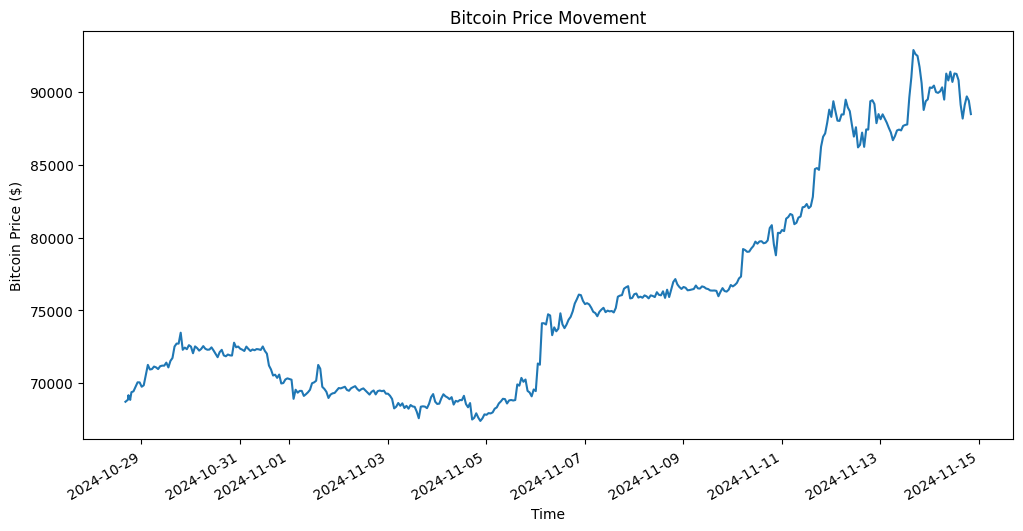

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(btc_data["time"], btc_data["price"])
plt.xlabel('Time')
plt.ylabel('Bitcoin Price ($)')
plt.title('Bitcoin Price Movement')

plt.gcf().autofmt_xdate()
plt.show()

## II Twitter Sentimental Analysis

In [2]:
tw_data = pd.read_csv('twitter_data.csv',index_col=0)
tw_data.head()

,symbol,name,tweet_id,screen_name,bookmarks,favorites,created_at,text,lang,quotes,replies,retweets,time
_id,,,,,,,,,,,,,
671fe1125a22311369600909,BTC,bitcoin,1849905253916786767,hamptonism,1144,9408,Fri Oct 25 20:05:56 +0000 2024,Switzerland unveils a new statue honoring the ...,en,78,113,803,2024-10-28 19:08:02.786000
671fe1125a2231136960090a,BTC,bitcoin,1850228656704049285,Ashcryptoreal,88,9210,Sat Oct 26 17:31:02 +0000 2024,"If Bitcoin breaks $72,000 by the end \nof Octo...",en,21,952,1278,2024-10-28 19:08:02.786000
671fe1125a2231136960090b,BTC,bitcoin,1849812562323325395,Vivek4real_,23,4219,Fri Oct 25 13:57:37 +0000 2024,"Like, If you think Microsoft should convert $7...",en,14,163,339,2024-10-28 19:08:02.786000
671fe1125a2231136960090c,BTC,bitcoin,1849150584693076274,MarwanNawaz,6,458,Wed Oct 23 18:07:09 +0000 2024,"Michael Saylor would ""volunteer"" his Bitcoin t...",en,3,9,74,2024-10-28 19:08:02.786000
671fe1125a2231136960090d,BTC,bitcoin,1848948161806798989,naiivememe,1779,10437,Wed Oct 23 04:42:48 +0000 2024,Me leaving my 9-5 job when Bitcoin hits 250K\n...,en,104,272,889,2024-10-28 19:08:02.786000


### Flair
- Test out Flair using selected twitter sample.
- Reference: [Flair](https://github.com/flairNLP/flair)

In [15]:
from flair.data import Sentence
from flair.nn import Classifier

sample = tw_data.iloc[0]["text"]
print("Sample: ", sample)
sentence = Sentence(sample)

tagger = Classifier.load('sentiment')
tagger.predict(sentence)

print("Sentiment Value: ", sentence.labels[0].value)
print("Sentiment Confidence: ", sentence.labels[0].score)

Sample:  Switzerland unveils a new statue honoring the creator of Bitcoin, Satoshi Nakamoto.
Sentiment Value:  POSITIVE
Sentiment Confidence:  0.8375274538993835


### Data Preprocessing
- Extract link values from the **text** column with regex.
- Remove all "\n" from the **text** column.
- Assert if there is any missing value for the **text** column.
- Assert if there is any empty string for the **text** column.

In [3]:
import re
import util.text as t

/Users/qianruzhang/anaconda3/envs/ds/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-15 14:57:37.913802: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Extract link values from the **text** column with regex.
tw_data['text'] = tw_data['text'].apply(
  lambda x: re.sub(r'https?://\S+', '', x).strip()
  )  
# Remove all "\n" from the **text** column.
tw_data['text'] = tw_data['text'].replace('\n', '', regex=True)

tw_data.iloc[1]['text']

'If Bitcoin breaks $72,000 by the end of October, I will give $2,000 BTC to 20 people who like this post.'

In [5]:
# Assert if there is any missing values for the **text** column
assert tw_data.isnull().sum()['text'] == 0

In [35]:
# Assert if there is any empty strings for the **text** column
assert len(tw_data.index[tw_data['text'] == ''].tolist()) == 0

AssertionError: 

In [40]:
# Check empty string for the **text** colum
print("Number of empty strings: ", len(tw_data.index[tw_data['text'] == ''].tolist()))
tw_data.index[tw_data['text'] == ''].tolist()[:5]


Number of empty strings:  34


['6725c23c2ecab7f9c39b03c1',
 '6725fa7e69400ce2a905b5de',
 '6726952c7222003579d6c677',
 '6726a33c966067f276961a06',
 '6726bf5f062b2dc3b39b4ca1']

In [6]:
tw_data[['sentiment', 'confidence']] = tw_data['text'].apply(
  lambda x: pd.Series(t.flair_sentiment(x))
  )

tw_data['sentiment'].head()
tw_data['confidence'].head()

2024-11-15 12:48:18,717 Warning: An empty Sentence was created! Are there empty strings in your dataset?
No result.
2024-11-15 12:48:20,521 Warning: An empty Sentence was created! Are there empty strings in your dataset?
No result.
2024-11-15 12:48:24,975 Warning: An empty Sentence was created! Are there empty strings in your dataset?
No result.
2024-11-15 12:48:25,836 Warning: An empty Sentence was created! Are there empty strings in your dataset?
No result.
2024-11-15 12:48:26,712 Warning: An empty Sentence was created! Are there empty strings in your dataset?
No result.
2024-11-15 12:48:27,223 Warning: An empty Sentence was created! Are there empty strings in your dataset?
No result.
2024-11-15 12:48:28,220 Warning: An empty Sentence was created! Are there empty strings in your dataset?
No result.
2024-11-15 12:48:30,123 Warning: An empty Sentence was created! Are there empty strings in your dataset?
No result.
2024-11-15 12:48:35,553 Warning: An empty Sentence was created! Are ther

_id
671fe1125a22311369600909    0.837527
671fe1125a2231136960090a    0.999922
671fe1125a2231136960090b    0.999045
671fe1125a2231136960090c    0.999005
671fe1125a2231136960090d    0.966333
Name: confidence, dtype: float64

In [7]:
# Convert current cleaned data to csv
tw_data.to_csv('updated_twitter_data.csv', index=False)

## Visualize Preprocessed Data
- Calculate the mean of **confidence** column grouped by each hour.

In [25]:
tw_data = pd.read_csv('updated_twitter_data.csv',index_col=0)
tw_data.describe()

,tweet_id,bookmarks,favorites,quotes,replies,retweets,confidence
count,6.783000e+03,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6749.000000
mean,1.853132e+18,344.167920,7389.324488,81.675365,679.662834,1521.031992,0.948544
std,3.611633e+15,1022.330479,13538.446088,264.784337,1339.249452,3072.752832,0.103069
min,1.773738e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.505566
25%,1.851317e+18,15.000000,737.500000,4.000000,54.000000,127.000000,0.956594
50%,1.853554e+18,70.000000,3113.000000,19.000000,193.000000,499.000000,0.997370
75%,1.854870e+18,234.000000,9210.000000,58.000000,515.500000,1397.000000,0.999629
max,1.857151e+18,17293.000000,208292.000000,3902.000000,12344.000000,34735.000000,0.999997


In [33]:
tw_data['confidence'] = np.where(tw_data['sentiment'] == 'NEGATIVE', 
                                 -tw_data['confidence'], 
                                 tw_data['confidence'])
tw_data.head(3)

,name,tweet_id,screen_name,bookmarks,favorites,created_at,text,lang,quotes,replies,retweets,time,sentiment,confidence
symbol,,,,,,,,,,,,,,
BTC,bitcoin,1849905253916786767,hamptonism,1144,9408,Fri Oct 25 20:05:56 +0000 2024,Switzerland unveils a new statue honoring the ...,en,78,113,803,2024-10-28 19:08:02.786,POSITIVE,0.837527
BTC,bitcoin,1850228656704049285,Ashcryptoreal,88,9210,Sat Oct 26 17:31:02 +0000 2024,"If Bitcoin breaks $72,000 by the end of Octobe...",en,21,952,1278,2024-10-28 19:08:02.786,NEGATIVE,-0.999922
BTC,bitcoin,1849812562323325395,Vivek4real_,23,4219,Fri Oct 25 13:57:37 +0000 2024,"Like, If you think Microsoft should convert $7...",en,14,163,339,2024-10-28 19:08:02.786,NEGATIVE,-0.999045


### Visualize Mean and Median Values

In [34]:
tw_data['time'] = pd.to_datetime(tw_data['time'])

In [35]:
tw_data = tw_data.sort_values(by='time')

hr_mean = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['confidence'].mean().reset_index()

hr_mean.head()

,time,confidence
0,2024-10-28 19:00:00,-0.659364
1,2024-10-28 20:00:00,-0.856142
2,2024-10-28 21:00:00,-0.547036
3,2024-10-28 22:00:00,-0.756660
4,2024-10-28 23:00:00,-0.620880


In [36]:
hr_med = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['confidence'].median().reset_index()

hr_med.head()

,time,confidence
0,2024-10-28 19:00:00,-0.962878
1,2024-10-28 20:00:00,-0.992461
2,2024-10-28 21:00:00,-0.991899
3,2024-10-28 22:00:00,-0.999045
4,2024-10-28 23:00:00,-0.966333


In [37]:
hr_std = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['confidence'].std().reset_index()

hr_std.head()

,time,confidence
0,2024-10-28 19:00:00,0.691188
1,2024-10-28 20:00:00,0.479230
2,2024-10-28 21:00:00,0.801825
3,2024-10-28 22:00:00,0.631571
4,2024-10-28 23:00:00,0.749525


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_31872/2415499655.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


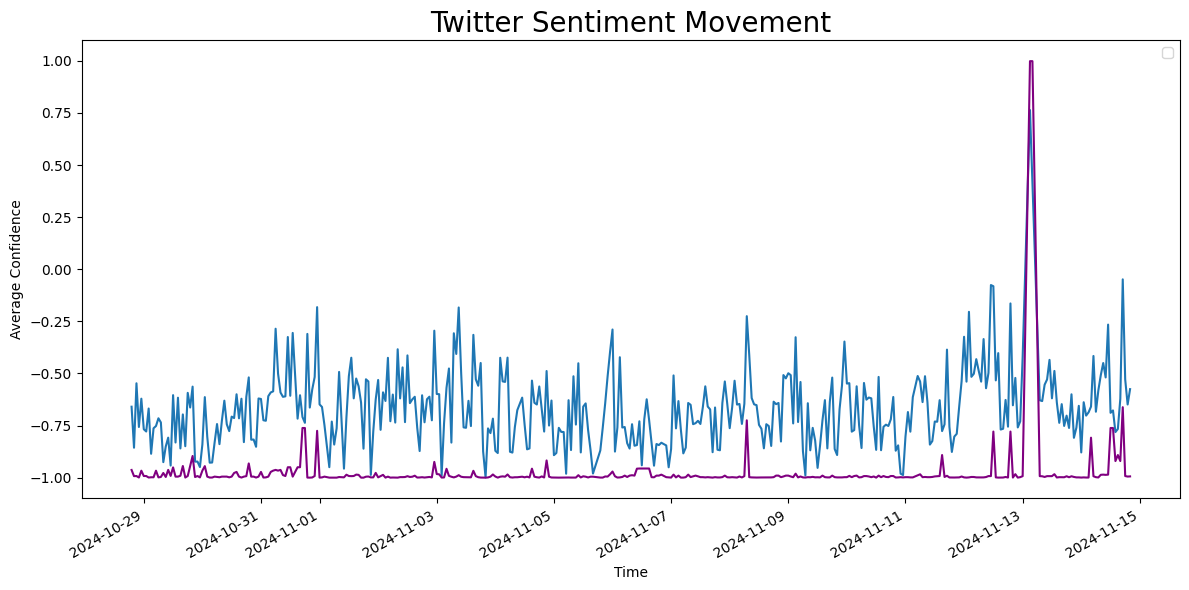

In [38]:
plt.figure(figsize=(12, 6))

plt.plot(hr_mean['time'], hr_mean['confidence'])
plt.plot(hr_med['time'], hr_med['confidence'], color='purple')

plt.title('Twitter Sentiment Movement', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Average Confidence')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()


### Visualize Sentiment Values
- For every hour, retrieve the number of "NEGATIVE" and "POSITIVE" from the **sentiment** column.
- Drop any empty data from **sentiment** column.

In [39]:
# For every hour, retrieve the number of "NEGATIVE" and "POSITIVE" from the **sentiment** column.
hr_pos_neg = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['sentiment'].value_counts().unstack().reset_index()

hr_pos_neg.head()

sentiment,time,NEGATIVE,POSITIVE
0,2024-10-28 19:00:00,28.0,6.0
1,2024-10-28 20:00:00,16.0,1.0
2,2024-10-28 21:00:00,13.0,4.0
3,2024-10-28 22:00:00,15.0,2.0
4,2024-10-28 23:00:00,14.0,3.0


In [40]:
# Check if there is any empty data
hr_pos_neg.isnull().sum()

sentiment
time         0
NEGATIVE     0
POSITIVE    21
dtype: int64

In [41]:
# Drop any empty data
hr_pos_neg = hr_pos_neg.dropna()[1:]

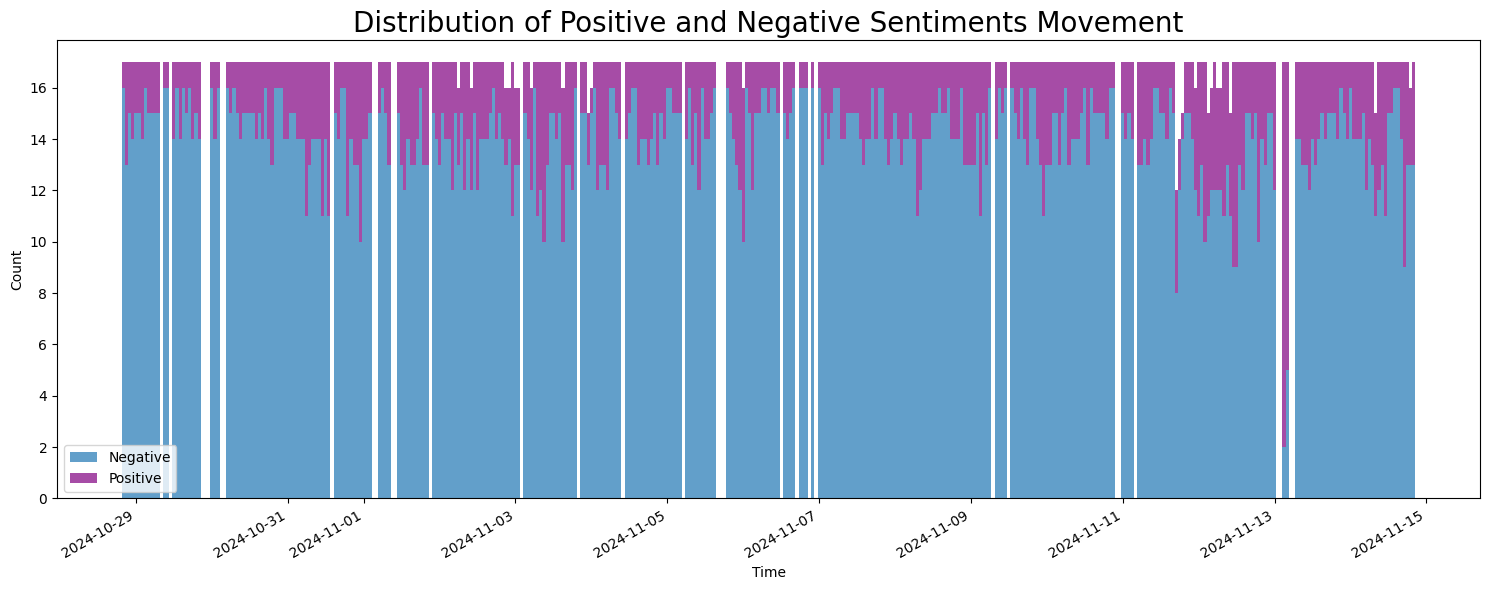

In [44]:
plt.figure(figsize=(15, 6))

plt.bar(hr_pos_neg['time'], hr_pos_neg['NEGATIVE'], width=1/24,
        alpha=0.7, label='Negative')

plt.bar(hr_pos_neg['time'], hr_pos_neg['POSITIVE'], width=1/24,
        bottom=hr_pos_neg['NEGATIVE'], color='purple', alpha=0.7, label='Positive')

plt.title('Distribution of Positive and Negative Sentiments Movement', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()